<a href="https://colab.research.google.com/github/vinhpeters/tf-exam/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression 

In [4]:
import tensorflow as tf

In [5]:
!nvidia-smi

Sat May 13 16:14:08 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060       WDDM | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P8                8W /  N/A|    647MiB /  6144MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
print(tf.__version__)
print(tf.config.list_physical_devices())

2.10.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Get some data

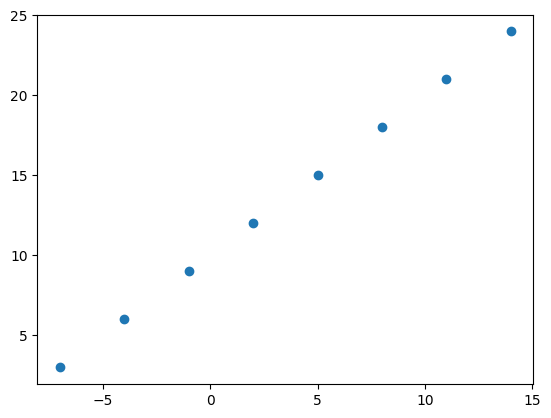

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])
plt.scatter(X,y)

In [9]:
X +10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

## Input and output shapes

In [10]:
# Demo tensor
house_info= tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

In [11]:
input_shape = X[0].shape

In [12]:
output_shape = y[0].shape

In [13]:
input_shape, output_shape

((), ())

In [14]:
X[0], y[0]

(-7.0, 3.0)

In [15]:
X[0].ndim

0

In [16]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
X[0].shape

TensorShape([])

## Steps in modelling with Tensorflow

In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))


In [19]:
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [20]:
model.fit(tf.expand_dims(X,axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 16.6465 - mae: 16.6465
Epoch 2/5
1/1 [==============================] - 0s 0s/step - loss: 16.3653 - mae: 16.3653
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 16.0840 - mae: 16.0840
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 15.8028 - mae: 15.8028
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 15.5215 - mae: 15.5215


In [21]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 80ms/step


array([[-8.1173525]], dtype=float32)

 ## Improving the model

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [23]:
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [24]:
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 235ms/step - loss: 10.1415 - mae: 10.1415
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0090 - mae: 10.0090
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8765 - mae: 9.8765
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7440 - mae: 9.7440
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6115 - mae: 9.6115
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4790 - mae: 9.4790
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 9.3465 - mae: 9.3465
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.2140 - mae: 9.2140
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0815 - mae: 9.0815
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9490 - mae: 8.9490
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 8

In [25]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[30.207912]], dtype=float32)

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.2), metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 9.5264 - mae: 9.5264
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6264 - mae: 8.6264
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7264 - mae: 7.7264
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0500 - mae: 7.0500
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 7.0744 - mae: 7.0744
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2027 - mae: 7.2027
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.1785 - mae: 7.1785
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 7.0441 - mae: 7.0441
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8267 - mae: 6.8267
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.5448 - mae: 6.5448
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 6.211

In [28]:
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[27.74136]], dtype=float32)

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation=None))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 316ms/step - loss: 12.2293 - mae: 12.2293
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 11.4665 - mae: 11.4665
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6980 - mae: 10.6980
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9218 - mae: 9.9218
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1345 - mae: 9.1345
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3328 - mae: 8.3328
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5141 - mae: 7.5141
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8942 - mae: 6.8942
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0122 - mae: 7.0122
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2917 - mae: 7.2917
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss:

In [30]:
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[26.61028]], dtype=float32)

In [31]:
X = tf.range(-100,100,4)
y = X+10

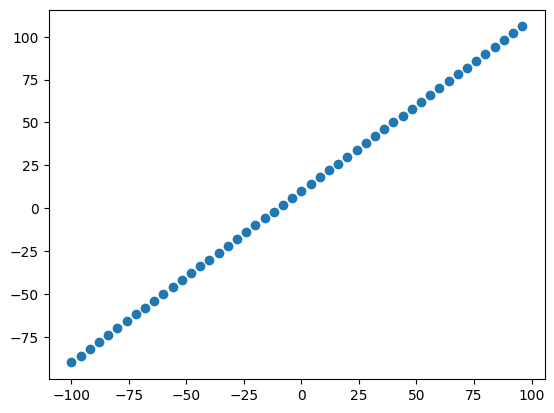

In [32]:
plt.scatter(X,y)

In [33]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]




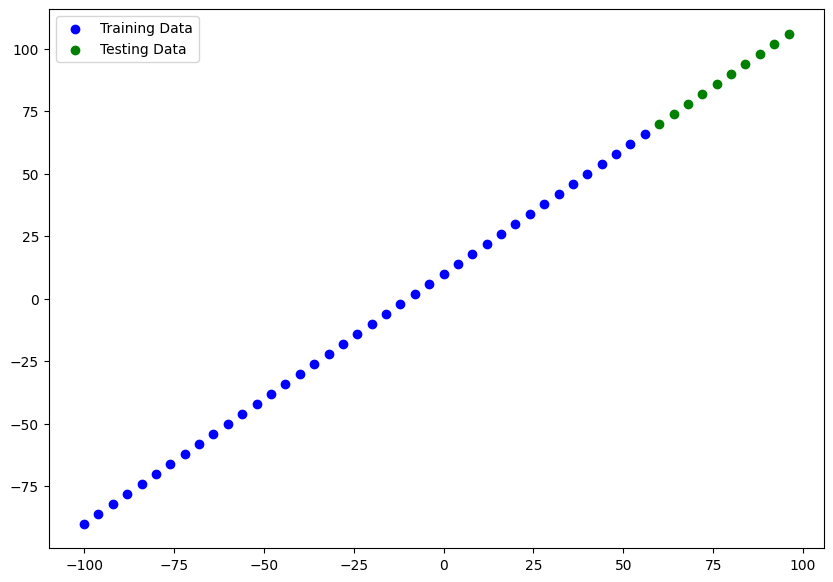

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c='b', label ='Training Data')
plt.scatter(X_test,y_test, c='g', label ='Testing Data')
plt.legend();

In [35]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, input_shape=[1], name='input'),
tf.keras.layers.Dense(1, name='output')
    
], name= 'linear')

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['mae'])

In [36]:
model.summary()

Model: "linear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                20        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 20.7888 - mae: 20.7888
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 18.6843 - mae: 18.6843
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 12.7502 - mae: 12.7502
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 14.9426 - mae: 14.9426
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7170 - mae: 8.7170
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8811 - mae: 9.8811
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 6.1891 - mae: 6.1891
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 7.2444 - mae: 7.2444
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 4.1788 - mae: 4.1788
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 5.5782 - mae: 5.5782
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - los

In [38]:
from tensorflow.keras.utils import plot_model

In [39]:
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualize model predictions

In [40]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 45ms/step


array([[ 69.86978 ],
       [ 73.854034],
       [ 77.83829 ],
       [ 81.822556],
       [ 85.8068  ],
       [ 89.79106 ],
       [ 93.775314],
       [ 97.75957 ],
       [101.74382 ],
       [105.72809 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [42]:
def plot_predictions(train_data=X_train, train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
    
    """
    Plots training data, test data and compares to true data.
    """

    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c='b', label='Training Data')
    plt.scatter(test_data,test_labels, c='g', label='Testing Data')
    plt.scatter(test_data,predictions, c='r', label='Predictions')
    plt.legend();

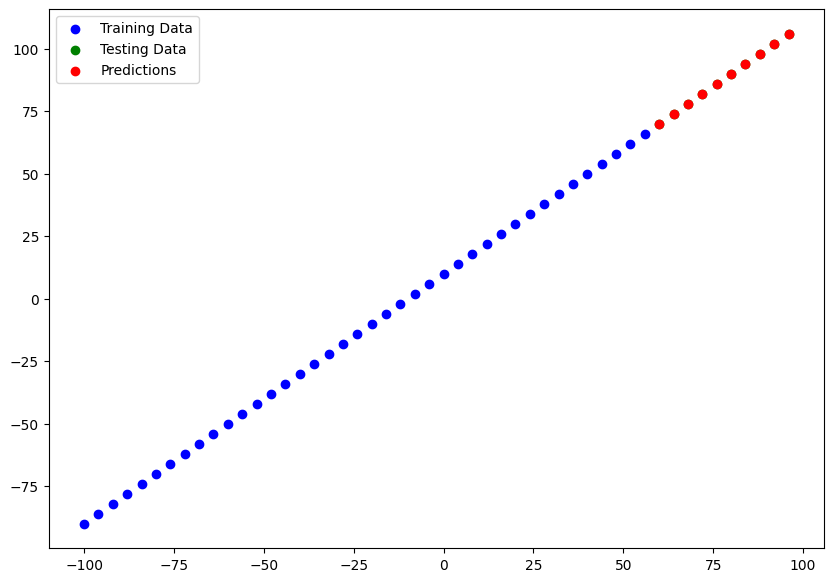

In [43]:
plot_predictions()

## Evaluation Metrics

In [44]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 124ms/step - loss: 0.2011 - mae: 0.2011


[0.20106887817382812, 0.20106887817382812]

In [45]:
y_pred=tf.squeeze(tf.constant(y_pred))

In [46]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.86978 ,  73.854034,  77.83829 ,  81.822556,  85.8068  ,
        89.79106 ,  93.775314,  97.75957 , 101.74382 , 105.72809 ],
      dtype=float32)>

In [47]:
y_test = tf.cast(y_test, dtype=tf.float32)

In [48]:
tf.reduce_sum(abs(y_pred-y_test))/10.

<tf.Tensor: shape=(), dtype=float32, numpy=0.20106888>

In [49]:
y_test.shape

TensorShape([10])

In [50]:
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.20106888>

In [51]:
tf.metrics.mean_squared_error(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.042473715>

In [52]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=y_pred)

In [53]:
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)

In [54]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

## `model_1`

In [55]:
tf.random.set_seed(42)

In [56]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.3705 - mae: 15.3705
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2634 - mae: 11.2634
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0819 - mae: 11.0819
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.3138 - mae: 9.3138
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1848 - mae: 10.1848
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4453 - mae: 9.4453
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5828 - mae: 8.5828
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0447 - mae: 9.0447
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7838 - mae: 18.7838
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1317 - mae: 10.1317
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

# Prediction plot

In [57]:
y_pred_1 = model_1.predict(y_test)

1/1 [==============================] - 0s 42ms/step


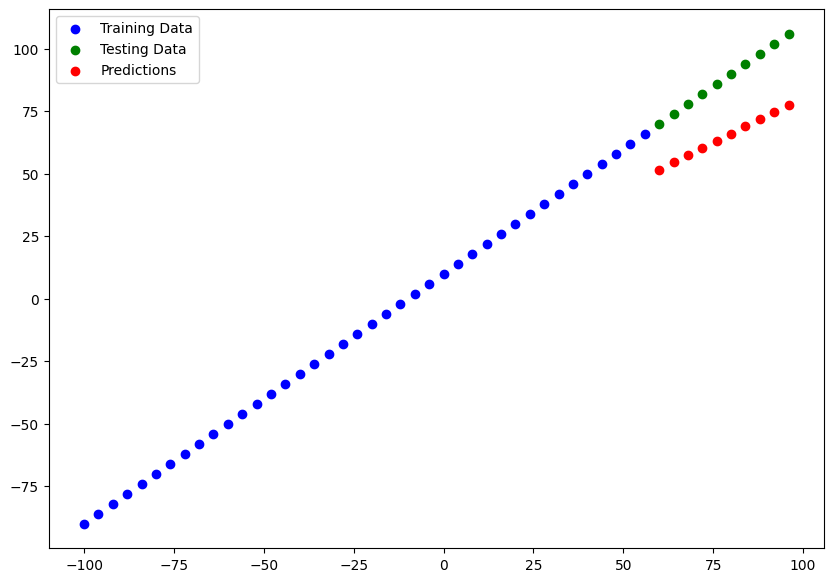

In [58]:
plot_predictions(predictions = y_pred_1)

## Eval metrics

In [59]:
mae_1=mae(y_test,tf.squeeze(y_pred_1))
mse_1=mse(y_test,tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=23.345417>,
 <tf.Tensor: shape=(), dtype=float32, numpy=555.36664>)

## Model 2

In [60]:
tf.random.set_seed(42)

In [61]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=['mse'])
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4748 - mse: 1112.1920
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 25.3498 - mse: 826.3032
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 30.1411 - mse: 1373.2634
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 29.5650 - mse: 1300.2849
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.1153 - mse: 289.5473
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0088 - mse: 174.8484
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3150 - mse: 154.8201
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1364 - mse: 166.2249
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 41.0058 - mse: 2664.8364
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.3304 - mse: 1132.3213
Epoch 11/100
2/2 [==========================

In [62]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 45ms/step


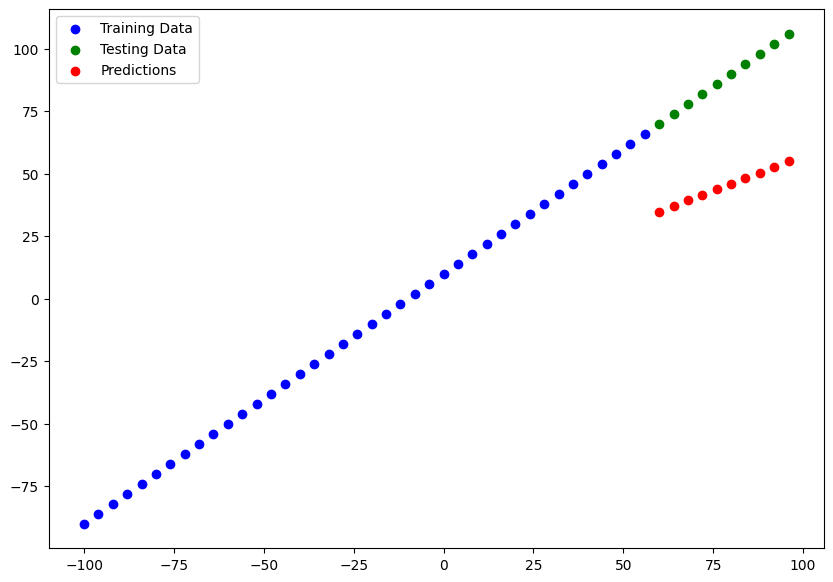

In [63]:
plot_predictions(predictions = y_pred_2)

In [64]:
mae_2=mae(y_test,tf.squeeze(y_pred_2))
mse_2=mse(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=43.084347>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1882.1276>)

In [65]:
tf.random.set_seed(42)

In [66]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 39.1368 - mae: 39.1368
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4726 - mae: 27.4726
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 32.6915 - mae: 32.6915
Epoch 4/500
2/2 [==============================] - 0s 13ms/step - loss: 27.1690 - mae: 27.1690
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.8380 - mae: 14.8380
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8096 - mae: 11.8096
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 11.1470 - mae: 11.1470
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0887 - mae: 11.0887
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.3684 - mae: 40.3684
Epoch 10/500
2/2 [==============================] - 0s 0s/step - loss: 27.7747 - mae: 27.7747
Epoch 11/500
2/2 [==============================] - 0s 4ms/st

1/1 [==============================] - 0s 43ms/step


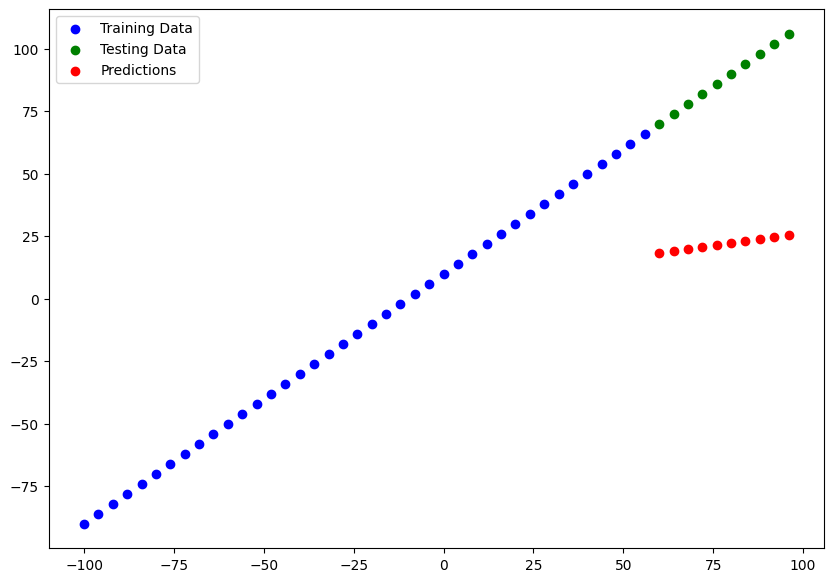

In [67]:
y_pred_3 = model_3.predict(y_pred)
plot_predictions(predictions=y_pred_3)

In [68]:
mae_3=mae(y_test,tf.squeeze(y_pred_3))
mse_3=mse(y_test,tf.squeeze(y_pred_3))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=66.12251>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4456.664>)

## Compare models

In [69]:
import pandas as pd
model_results = [["model_1", mae_1.numpy(),mse_1.numpy()],
                 ["model_2", mae_2.numpy(),mse_2.numpy()],
                 ["model_3", mae_3.numpy(),mse_3.numpy()]]

In [70]:
all_results = pd.DataFrame(model_results, columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,23.345417,555.366638
1,model_2,43.084347,1882.127563
2,model_3,66.122513,4456.664062


In [71]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_2.save("best_model")

INFO:tensorflow:Assets written to: best_model\assets


In [73]:
model_2.save('best_model.h5')

In [74]:
loaded_model = tf.keras.models.load_model('/content/best_model')

OSError: No file or directory found at /content/best_model

In [ ]:
loaded_model.summary()

## Medical cost dataset

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

In [ ]:
X = insurance_one_hot.drop('charges', axis = 1 )
X

In [ ]:
y = insurance_one_hot.charges
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42  )
len(X), len(X_train), len(X_test)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
tf.keras.layers.Dense(10),    
tf.keras.layers.Dense(1)    
])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics = ['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
y_train.median(), y_train.mean()

## Add extra layer

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
tf.keras.layers.Dense(100),    
tf.keras.layers.Dense(10),    
tf.keras.layers.Dense(1)    
])

insurance_model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics = ['mae'])
insurance_model_2.fit(X_train, y_train, epochs=100)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
tf.keras.layers.Dense(100),    
tf.keras.layers.Dense(10),    
tf.keras.layers.Dense(1)    
])

insurance_model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics = ['mae'])
history = insurance_model_3.fit(X_train, y_train, epochs=200)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

In [ ]:
pd.DataFrame(history.history).plot()

## Normalization and standardization

In [ ]:
X

In [ ]:
X["age"].plot(kind='hist')

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
X["children"].value_counts()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker','region']))                         

X = insurance.drop('charges',axis=1)
y = insurance.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

In [ ]:
X_train.shape, X_train_normal.shape

In [ ]:
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
tf.keras.layers.Dense(100),    
tf.keras.layers.Dense(10),    
tf.keras.layers.Dense(1)    
])

insurance_model_normal.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics = ['mae'])
history = insurance_model_normal.fit(X_train_normal, y_train, epochs=100)

In [ ]:
insurance_model_normal.evaluate(X_test_normal, y_test)